In [7]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
print( 'The scikit learn version is {}.'.format(sklearn.__version__))
df = pd.read_csv('treasury.csv')
print(df.shape)
df.drop(df.iloc[:, 0:2], inplace = True, axis = 1)
print(df.shape) 
df = df.applymap(lambda x: 1 if x == True else x)
df = df.applymap(lambda x: 0 if x == False else x)
X, y = df.iloc[:,0:-1], df.iloc[:,-1]
print(X.shape, y.shape)
print(y)



















The scikit learn version is 0.21.2.
(900, 12)
(900, 10)
(900, 9) (900,)
0      1
1      0
2      0
3      1
4      0
5      1
6      0
7      1
8      0
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     1
25     1
26     1
27     0
28     1
29     1
      ..
870    0
871    1
872    0
873    0
874    0
875    1
876    0
877    0
878    0
879    0
880    0
881    1
882    0
883    1
884    1
885    1
886    0
887    0
888    0
889    0
890    1
891    0
892    1
893    0
894    0
895    0
896    0
897    1
898    1
899    1
Name: squeeze, Length: 900, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors = 15)
# Get dataset with only the first two attributes
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
knn.fit(X_train,y_train)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import metrics
y_train_pred = knn.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

y_pred = knn.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.confusion_matrix(y_test, y_pred) )
k_range = range(1, 26)
scores = []
K = 0
curr = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    temp = metrics.accuracy_score(y_test, y_pred)
    if temp > curr:
        curr = temp
        K = k
    scores.append(metrics.accuracy_score(y_test, y_pred))



(675, 9) (675,)
0.6948148148148148
0.6622222222222223
[[115  21]
 [ 55  34]]


[0.5688888888888889, 0.6266666666666667, 0.5511111111111111, 0.5377777777777778, 0.5777777777777777, 0.5911111111111111, 0.6088888888888889, 0.6133333333333333, 0.6177777777777778, 0.6444444444444445, 0.6444444444444445, 0.6755555555555556, 0.6533333333333333, 0.6755555555555556, 0.6622222222222223, 0.6888888888888889, 0.6622222222222223, 0.6711111111111111, 0.6444444444444445, 0.6622222222222223, 0.6666666666666666, 0.6755555555555556, 0.6622222222222223, 0.6844444444444444, 0.68]
Best choice of K for this data is 16


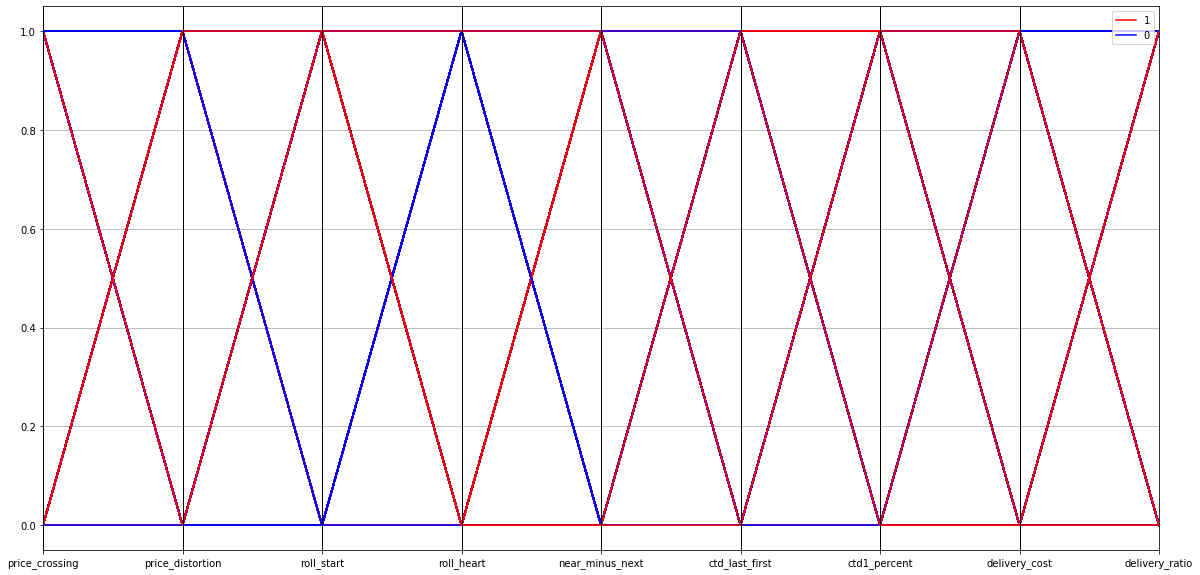

My name is {Zijie Lin}
My NetID is: {zlin36}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [48]:
print (scores)
print ('Best choice of K for this data is', K)
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df,'squeeze',color=('red', 'blue'))
plt.show()

print("My name is {Zijie Lin}")
print("My NetID is: {zlin36}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")